In [105]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, KFold

In [107]:
# Loading data from Google Drive
data_path = '/Users/sowjanyapadala/Desktop/Coursework/Q3/DATA_5322_Statistical_Machine_Learning2/Final_Project/Spotify_project/Dataset/SpotifyFeatures.csv'
spotify_df = pd.read_csv(data_path)

In [109]:
# Clean duplicated Tracks
spotify_df= spotify_df.drop_duplicates(subset=['track_id'])
count = spotify_df['track_id'].value_counts()
num_duplicated_ids = (count > 1).sum()
print("Number of unique tracks that are duplicated after cleaning:", num_duplicated_ids)

Number of unique tracks that are duplicated after cleaning: 0


In [111]:
# Strip Leading/Trailing Whitespace and Fix Case
spotify_df['genre'] = spotify_df['genre'].str.replace('’', "'", regex=False)
spotify_df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

In [113]:
# Mapping similar genre
genre_mapping = {
    'Pop': 'Pop/Rock',
    'Rock': 'Pop/Rock',
    'Indie': 'Pop/Rock',
    'Alternative': 'Pop/Rock',
    'Soul': 'Pop/Rock',
    'Hip-Hop': 'Hip-Hop/Rap/R&B',
    'Rap': 'Hip-Hop/Rap/R&B',
    'R&B': 'Hip-Hop/Rap/R&B',
    'Dance': 'Dance/Electronic',
    'Electronic': 'Dance/Electronic',
    'Reggaeton': 'Dance/Electronic',
    'Reggae': 'Dance/Electronic',
    'Ska': 'Dance/Electronic',
    'Jazz': 'Jazz/Blues',
    'Blues': 'Jazz/Blues',
    'Classical': 'Classical/Opera',
    'Opera': 'Classical/Opera',
    'Country': 'Country/Folk',
    'Folk': 'Country/Folk',
    'World': 'World/Soundtrack',
    'Soundtrack': 'World/Soundtrack',
    'Movie': 'Movie/Comedy',
    'Comedy': 'Movie/Comedy',
    'Children\'s Music': 'Children/Anime',
    'Anime': 'Children/Anime',
    'A Capella': 'Pop/Rock'
}
spotify_df['genre_grouped'] = spotify_df['genre'].map(genre_mapping)


In [115]:
print(spotify_df['genre_grouped'].value_counts())


genre_grouped
Dance/Electronic    42384
Pop/Rock            21606
Movie/Comedy        17476
Classical/Opera     16991
Jazz/Blues          16535
World/Soundtrack    16453
Children/Anime      15676
Country/Folk        15431
Hip-Hop/Rap/R&B     14222
Name: count, dtype: int64


In [117]:
# Log Transform
spotify_df['duration_ms'] = np.log1p(spotify_df['duration_ms'])
spotify_df['instrumentalness'] = np.log1p(spotify_df['instrumentalness'])
spotify_df['speechiness'] = np.log1p(spotify_df['speechiness'])

# Encode Categorical Data
for col in ['key', 'mode', 'time_signature']:
    le = LabelEncoder()
    spotify_df[col] = le.fit_transform(spotify_df[col])



numeric_features = [
    'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]



In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
spotify_df[numeric_features] = scaler.fit_transform(spotify_df[numeric_features])




In [121]:
spotify_df[numeric_features].head(5)

popularity  acousticness  danceability  duration_ms    energy  \
0   -2.085747      0.564740     -0.798733    -1.752675  1.279646   
1   -2.028246     -0.431708      0.257016    -1.015026  0.652467   
2   -1.913244      1.495668      0.640447    -0.526019 -1.544471   
3   -2.085747      0.815900     -1.581352    -0.778149 -0.837536   
4   -1.855743      1.490208     -1.103376    -2.173113 -1.203692   

   instrumentalness  liveness  loudness  speechiness     tempo   valence  
0         -0.547439  0.575611  1.299283    -0.384671  1.588677  1.353170  
1         -0.547439 -0.348444  0.715907    -0.165891  1.813226  1.360637  
2         -0.547439 -0.575904 -0.585001    -0.491152 -0.565544 -0.312134  
3         -0.547439 -0.597228 -0.319034    -0.469460  1.741558 -0.838608  
4         -0.051906 -0.106768 -1.721889    -0.429543  0.746124 -0.229989

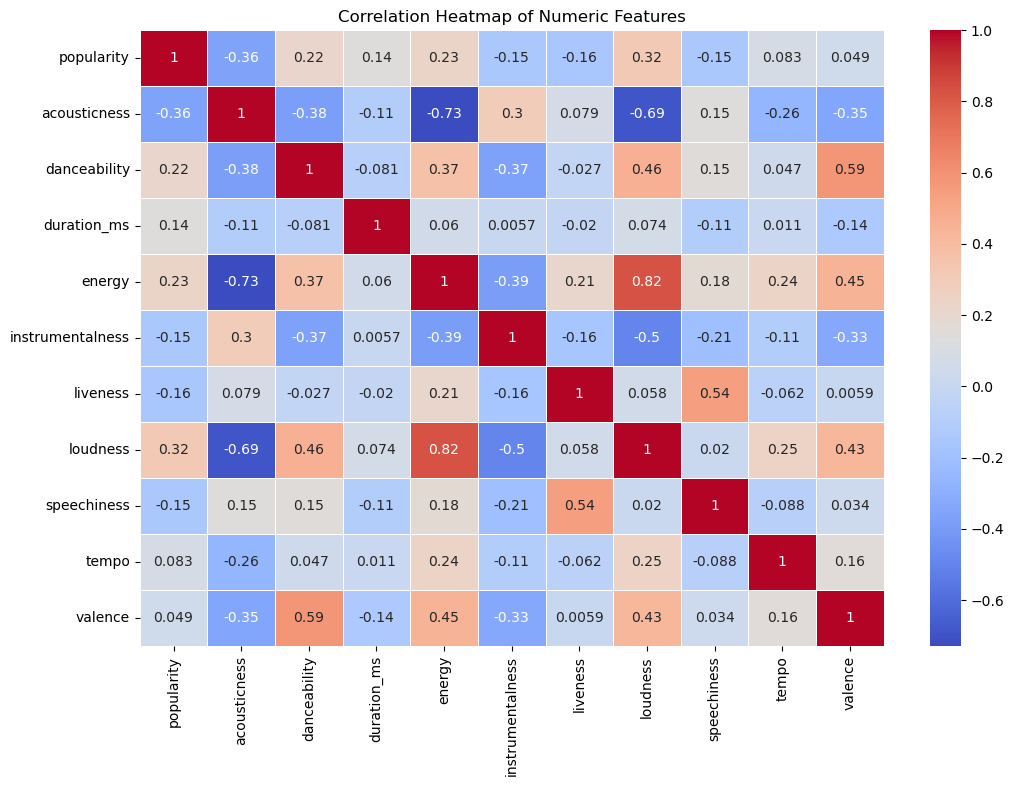

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = spotify_df[numeric_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import time

In [127]:
X = spotify_df[numeric_features].values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(spotify_df['genre_grouped'])
y_categorical = to_categorical(y_encoded)

In [129]:
for i, label in enumerate(label_encoder.classes_):
    print(f"{i}: {label}")

0: Children/Anime
1: Classical/Opera
2: Country/Folk
3: Dance/Electronic
4: Hip-Hop/Rap/R&B
5: Jazz/Blues
6: Movie/Comedy
7: Pop/Rock
8: World/Soundtrack


In [131]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

In [141]:
# Get the number of features and classes
input_shape = X_train.shape[1]
num_classes = y_train.shape[1]

# Build the model
model1_nn = Sequential()
model1_nn.add(Dense(256, activation='relu', input_shape=(input_shape,)))
model1_nn.add(BatchNormalization())
model1_nn.add(Dropout(0.3))

model1_nn.add(Dense(128, activation='relu'))
model1_nn.add(BatchNormalization())
model1_nn.add(Dropout(0.3))

model1_nn.add(Dense(64, activation='relu'))
model1_nn.add(BatchNormalization())
model1_nn.add(Dropout(0.3))

model1_nn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model1_nn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:


early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)


start_time = time.time()  # Record the start time

history1 = model1_nn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

end_time = time.time()  # Record the end time

total_time = end_time - start_time
print(f"Training completed in {total_time:.2f} seconds.")



Epoch 1/100
4420/4420 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - Precision: 0.6331 - Recall: 0.3138 - accuracy: 0.4883 - loss: 1.4099 - val_Precision: 0.7422 - val_Recall: 0.4143 - val_accuracy: 0.5962 - val_loss: 1.0854
Epoch 2/100
4420/4420 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - Precision: 0.7056 - Recall: 0.3804 - accuracy: 0.5619 - loss: 1.1847 - val_Precision: 0.7359 - val_Recall: 0.4472 - val_accuracy: 0.6070 - val_loss: 1.0554
Epoch 3/100
4420/4420 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - Precision: 0.7125 - Recall: 0.4020 - accuracy: 0.5771 - loss: 1.1487 - val_Precision: 0.7302 - val_Recall: 0.4505 - val_accuracy: 0.6078 - val_loss: 1.0506
Epoch 4/100
4420/4420 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - Precision: 0.7192 - Recall: 0.4118 - accuracy: 0.5814 - loss: 1.1320 - val_Precision: 0.7451 - val_Recall: 0.4522 - val_accuracy: 0.6117 - val_loss: 1.0384
Epoch 5/100
4420/4420 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - Precision: 0.7225 - Recall: 0.4176 - accuracy: 0.5834 - loss: 1.1238 - val_Precision: 

In [17]:

results = model1_nn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")


Test Accuracy: 0.6316
Test Precision: 0.7560
Test Recall: 0.4811


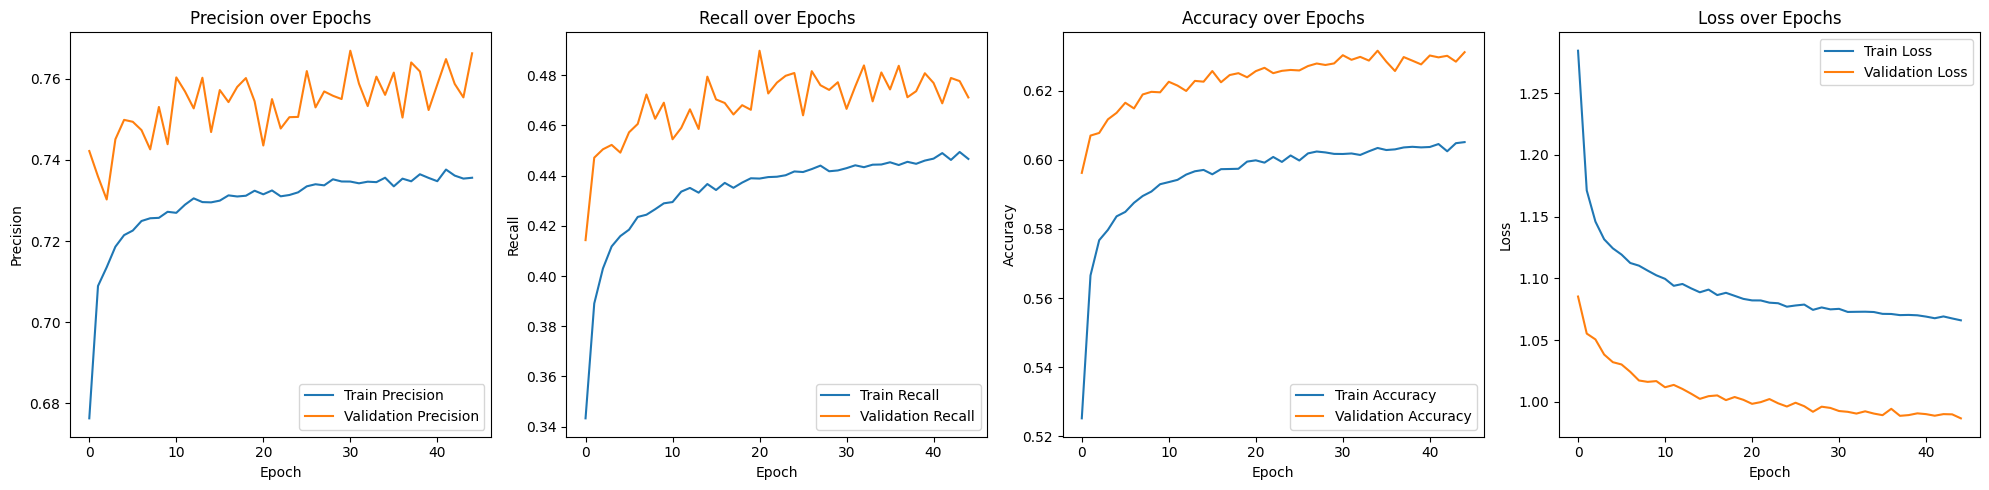

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# Precision Plot
plt.subplot(1, 4, 1)
plt.plot(history1.history['Precision'], label='Train Precision')
plt.plot(history1.history['val_Precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Precision over Epochs')
plt.legend()

# Recall Plot
plt.subplot(1, 4, 2)
plt.plot(history1.history['Recall'], label='Train Recall')
plt.plot(history1.history['val_Recall'], label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall over Epochs')
plt.legend()

# Accuracy Plot
plt.subplot(1, 4, 3)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Loss Plot
plt.subplot(1, 4, 4)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


1105/1105 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


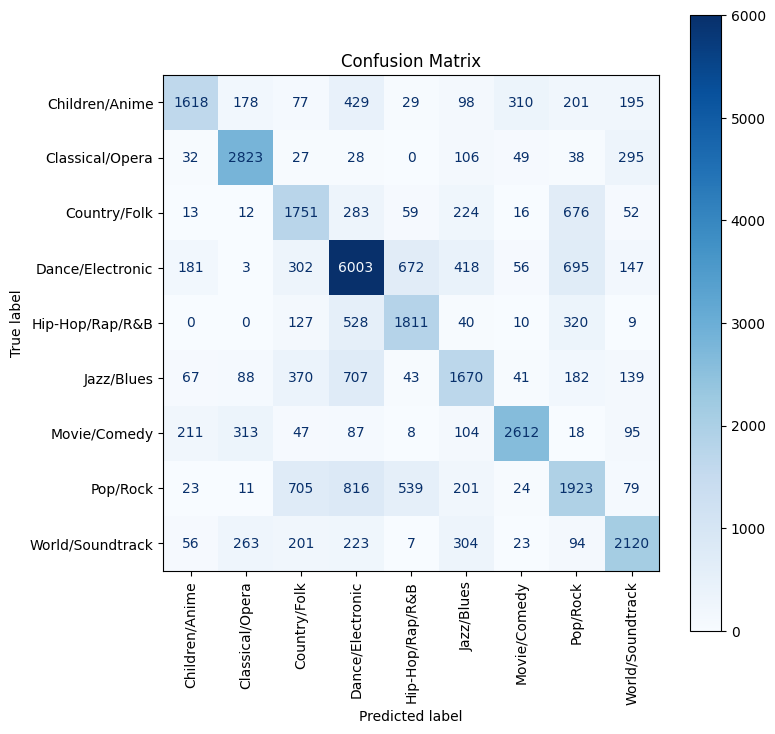

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict on the test set
y_pred_probs1 = model1_nn.predict(X_test)

# Convert one-hot predictions to class labels
y_pred1 = np.argmax(y_pred_probs1, axis=1)

# Convert one-hot true labels to class labels
y_true1 = np.argmax(y_test, axis=1)
cm1 = confusion_matrix(y_true1, y_pred1)
class_names = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()


Performance Metrics (Test Set):\
Accuracy: 63.16%\
Precision: 75.60%\
Recall: 48.11%\
These results indicate that the model is effective in predicting genre classes with high precision which means that out of all the tracks the model predicted that the track belongs to particular genre approximately 75.6% were actually correct. However, the lower recall suggests that it misses several true positive cases.\
The training/validation accuracy and precision curves shows a consistent upward trend, with validation outperforming training slightly which indicates good generalization.


In [20]:
# Build the model with 2 hidden layers
model2_nn = Sequential()

# First hidden layer
model2_nn.add(Dense(256, activation='relu', input_shape=(input_shape,)))
model2_nn.add(BatchNormalization())
model2_nn.add(Dropout(0.3))

# Second hidden layer
model2_nn.add(Dense(128, activation='relu'))
model2_nn.add(BatchNormalization())
model2_nn.add(Dropout(0.3))

# Output layer
model2_nn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model2_nn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
start_time = time.time()
history2 = model2_nn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=45,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)
end_time = time.time()  # Record the end time

total_time = end_time - start_time
print(f"Training completed in {total_time:.2f} seconds.")



Epoch 1/45
4420/4420 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - Precision: 0.6358 - Recall: 0.3529 - accuracy: 0.5106 - loss: 1.3504 - val_Precision: 0.7355 - val_Recall: 0.4145 - val_accuracy: 0.5959 - val_loss: 1.0827
Epoch 2/45
4420/4420 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - Precision: 0.7095 - Recall: 0.4040 - accuracy: 0.5719 - loss: 1.1471 - val_Precision: 0.7391 - val_Recall: 0.4484 - val_accuracy: 0.6100 - val_loss: 1.0467
Epoch 3/45
4420/4420 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - Precision: 0.7153 - Recall: 0.4179 - accuracy: 0.5831 - loss: 1.1179 - val_Precision: 0.7455 - val_Recall: 0.4520 - val_accuracy: 0.6140 - val_loss: 1.0371
Epoch 4/45
4420/4420 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - Precision: 0.7208 - Recall: 0.4210 - accuracy: 0.5841 - loss: 1.1116 - val_Precision: 0.7498 - val_Recall: 0.4546 - val_accuracy: 0.6182 - val_loss: 1.0263
Epoch 5/45
4420/4420 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - Precision: 0.7215 - Recall: 0.4302 - accuracy: 0.5922 - loss: 1.0939 - val_Precision: 0.749

In [22]:

results = model2_nn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")


Test Accuracy: 0.6342
Test Precision: 0.7607
Test Recall: 0.4752


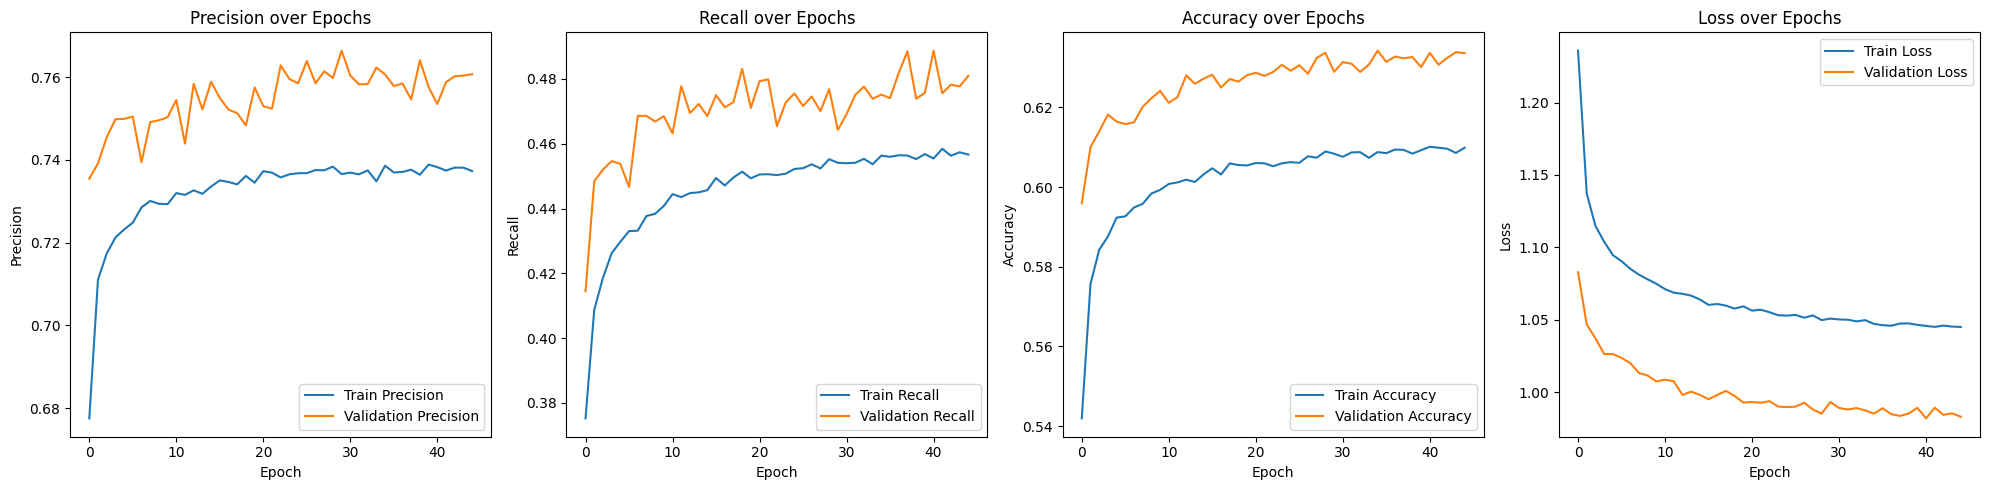

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# Precision Plot
plt.subplot(1, 4, 1)
plt.plot(history2.history['Precision'], label='Train Precision')
plt.plot(history2.history['val_Precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Precision over Epochs')
plt.legend()

# Recall Plot
plt.subplot(1, 4, 2)
plt.plot(history2.history['Recall'], label='Train Recall')
plt.plot(history2.history['val_Recall'], label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall over Epochs')
plt.legend()

# Accuracy Plot
plt.subplot(1, 4, 3)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Loss Plot
plt.subplot(1, 4, 4)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


1105/1105 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


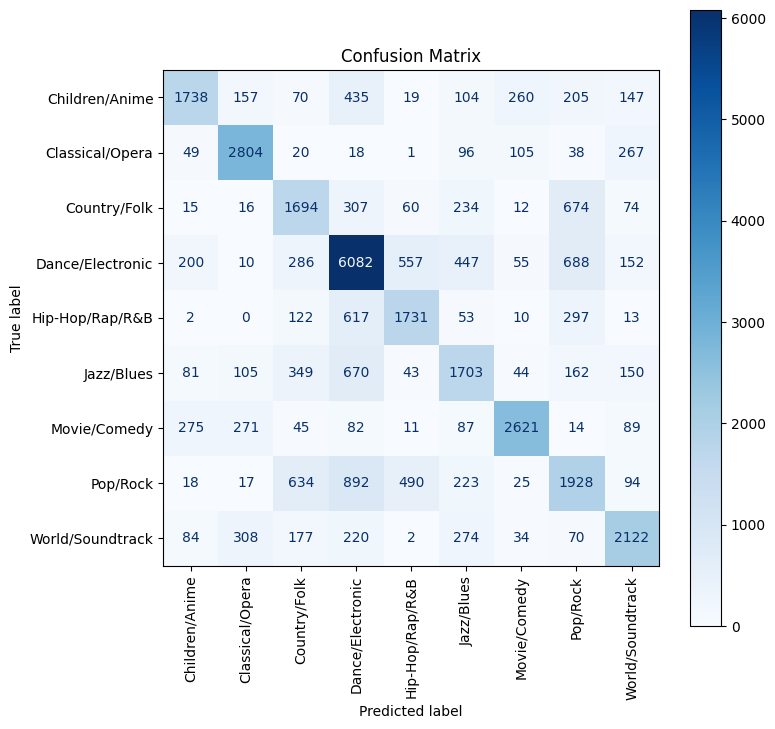

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict on the test set
y_pred_probs2 = model2_nn.predict(X_test)

# Convert one-hot predictions to class labels
y_pred2 = np.argmax(y_pred_probs2, axis=1)

# Convert one-hot true labels to class labels
y_true2= np.argmax(y_test, axis=1)
cm2 = confusion_matrix(y_true2, y_pred2)
class_names = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()


Performance Summary (Test Set):\
Accuracy: 63.42%\
Precision: 76.07%\
Recall: 47.52%\
The values when compared to model1, shows not much noticeable improvement in the accuracy, precision and recall is marginally lower compared to model1. This indicates that reducing the number of hidden layers from three to two in Model 2 did not lead to a significant performance gain. The minimal difference suggests that the third hidden layer in Model 1 may not have contributed substantial complexity or learning capacity to justify the additional computational cost. Model 2 thus achieves comparable performance with a simpler architecture, making it a more efficient alternative.

In [33]:
import pandas as pd
from sklearn.utils import shuffle

# Combine X and y into a DataFrame
data_combined = pd.concat([pd.DataFrame(X), pd.Series(y_encoded, name='label')], axis=1)

# Find the minimum class count
min_count = data_combined['label'].value_counts().min()

# Downsample each class
downsampled = data_combined.groupby('label').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)

# Separate features and labels
X_downsampled = downsampled.drop('label', axis=1).values
y_downsampled = downsampled['label'].values

# Encode labels to categorical
y_downsampled_categorical = to_categorical(y_downsampled)

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_downsampled, y_downsampled_categorical,
    test_size=0.2,
    random_state=42,
    stratify=y_downsampled
)


<ipython-input-33-761a065d90de>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  downsampled = data_combined.groupby('label').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


In [39]:
# Get the number of features and classes
input_shape = X_train.shape[1]
num_classes = y_train.shape[1]
# Build the model with 2 hidden layers
model4_nn = Sequential()

# First hidden layer
model4_nn.add(Dense(256, activation='relu', input_shape=(input_shape,)))
model4_nn.add(BatchNormalization())
model4_nn.add(Dropout(0.2))

# Second hidden layer
model4_nn.add(Dense(128, activation='relu'))
model4_nn.add(BatchNormalization())
model4_nn.add(Dropout(0.2))

# Output layer
model4_nn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model4_nn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:

results = model4_nn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")


Test Accuracy: 0.6468
Test Precision: 0.7621
Test Recall: 0.5098


800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


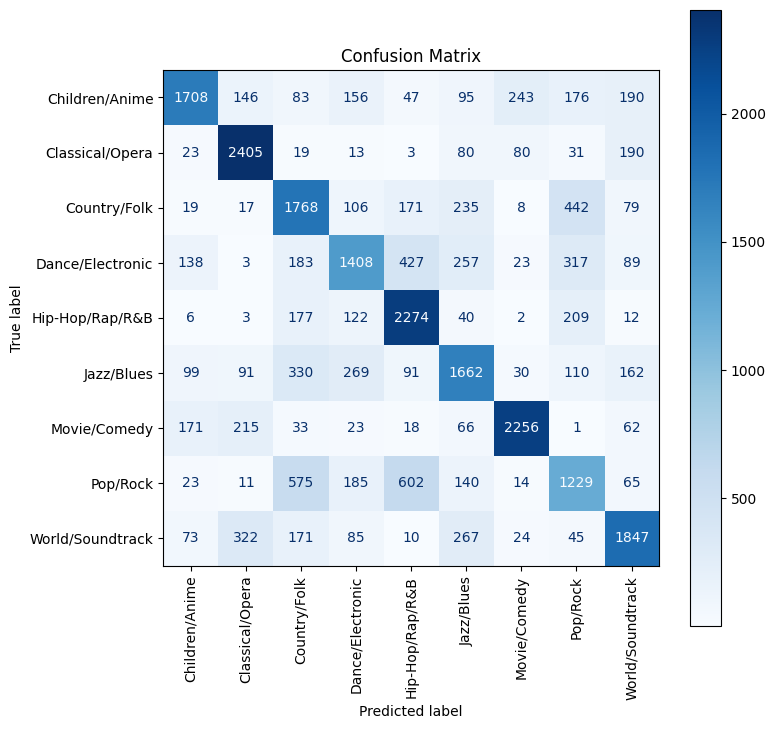

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict on the test set
y_pred_probs4 = model4_nn.predict(X_test)

# Convert one-hot predictions to class labels
y_pred4 = np.argmax(y_pred_probs4, axis=1)

# Convert one-hot true labels to class labels
y_true4= np.argmax(y_test, axis=1)
cm4 = confusion_matrix(y_true4, y_pred4)
class_names = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()


In [48]:

# Build the model with 2 hidden layers
model5_nn = Sequential()

# First hidden layer
model5_nn.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model5_nn.add(BatchNormalization())
model5_nn.add(Dropout(0.2))

# Second hidden layer
model5_nn.add(Dense(128, activation='relu'))
model5_nn.add(BatchNormalization())
model5_nn.add(Dropout(0.2))

# Output layer
model5_nn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model5_nn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

In [49]:
import time
start_time = time.time()
history5 = model5_nn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=128,
    verbose=1,
    callbacks=[early_stopping],

)
end_time = time.time()  # Record the end time

total_time = end_time - start_time
print(f"Training completed in {total_time:.2f} seconds.")


Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - Precision: 0.6216 - Recall: 0.3058 - accuracy: 0.4706 - loss: 1.4942 - val_Precision: 0.7343 - val_Recall: 0.4148 - val_accuracy: 0.5963 - val_loss: 1.1150
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Precision: 0.7062 - Recall: 0.3935 - accuracy: 0.5677 - loss: 1.1876 - val_Precision: 0.7353 - val_Recall: 0.4387 - val_accuracy: 0.6056 - val_loss: 1.0889
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Precision: 0.7132 - Recall: 0.4090 - accuracy: 0.5790 - loss: 1.1580 - val_Precision: 0.7356 - val_Recall: 0.4479 - val_accuracy: 0.6092 - val_loss: 1.0726
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - Precision: 0.7204 - Recall: 0.4263 - accuracy: 0.5897 - loss: 1.1294 - val_Precision: 0.7428 - val_Recall: 0.4513 - val_accuracy: 0.6135 - val_loss: 1.0586
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - Precision: 0.7252 - Recall: 0.4347 - accuracy: 0.5944 - loss: 1.1144 - val_Precision: 0.7410 - val_Recall

In [50]:

results = model5_nn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")


Test Accuracy: 0.6351
Test Precision: 0.7586
Test Recall: 0.4893


800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


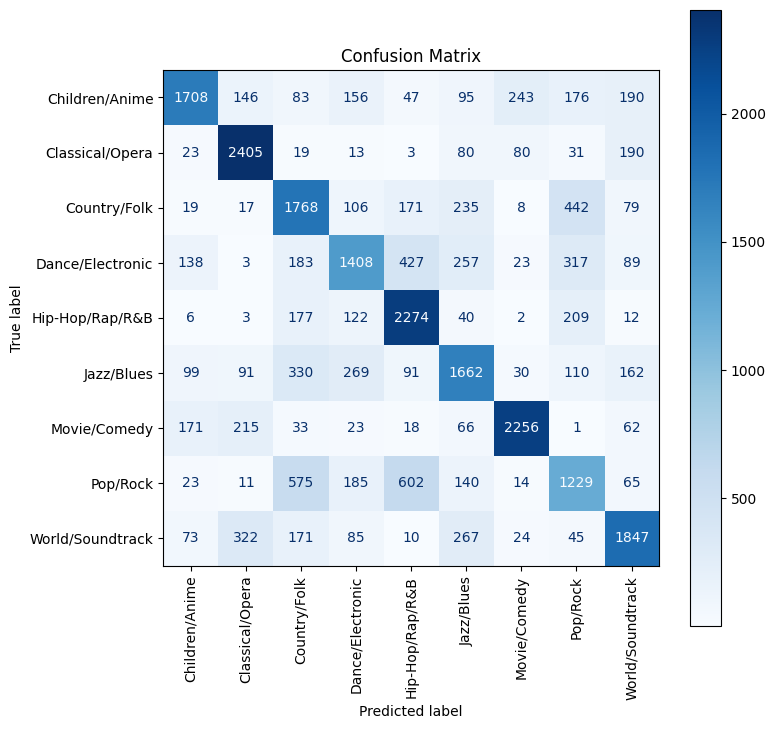

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict on the test set
y_pred_probs5 = model4_nn.predict(X_test)

# Convert one-hot predictions to class labels
y_pred5 = np.argmax(y_pred_probs4, axis=1)

# Convert one-hot true labels to class labels
y_true5= np.argmax(y_test, axis=1)
cm5 = confusion_matrix(y_true5, y_pred5)
class_names = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()


In [53]:
from sklearn.metrics import classification_report


# For Model A
report_a = classification_report(y_true2, y_pred2, target_names=label_encoder.classes_)
print("Model A Classification Report:\n", report_a)

# For Model B
report_b = classification_report(y_true4, y_pred4, target_names=label_encoder.classes_)
print("Model B Classification Report with Undersampling:\n", report_b)


Model A Classification Report:
                   precision    recall  f1-score   support

  Children/Anime       0.71      0.55      0.62      3135
 Classical/Opera       0.76      0.83      0.79      3398
    Country/Folk       0.50      0.55      0.52      3086
Dance/Electronic       0.65      0.72      0.68      8477
 Hip-Hop/Rap/R&B       0.59      0.61      0.60      2845
      Jazz/Blues       0.53      0.51      0.52      3307
    Movie/Comedy       0.83      0.75      0.79      3495
        Pop/Rock       0.47      0.45      0.46      4321
World/Soundtrack       0.68      0.64      0.66      3291

        accuracy                           0.63     35355
       macro avg       0.64      0.62      0.63     35355
    weighted avg       0.64      0.63      0.63     35355

Model B Classification Report with Undersampling:
                   precision    recall  f1-score   support

  Children/Anime       0.76      0.60      0.67      2844
 Classical/Opera       0.75      0.85      

Performance Summary (Test Set) for model 4(2 hidden layers with 256 and 128 units):\
Accuracy: 64.68%\
Precision: 76.21%\
Recall: 50.98%\
These results mark a notable improvement in recall, while accuracy and precision slightly exceeded when compared to previous models. The higher recall indicates the model became more sensitive to identifying correct genre labels across all classes, likely due to the balanced class distribution during training. Undersampling the data led to better generalization across all genre classes, especially for those with the fewer samples for the class.\
Even the confusion matrix shows predictions are more evenly distributed across genre classes, with less dominance by majority class Dance/Electronic.

Performance Summary (Test Set) for model 5(2 hidden layers with 64 and 128 units):\
Accuracy: 63.52%\
Precision: 75.86%\
Recall: 48.93%\
Compared to Model 4, Model 5 demonstrated a slight decline in all performance metrics. This suggests that reducing the capacity of the first hidden layer to 64 units may have limited the model’s ability to effectively learn complex feature patterns, resulting in lower generalization performance.

Among all models evaluated, the neural network trained on balanced (undersampled) data with two hidden layers of sizes 256 and 128 (Model 4) achieved the best overall results. This makes it the most effective architecture for multiclass genre classification in this project.

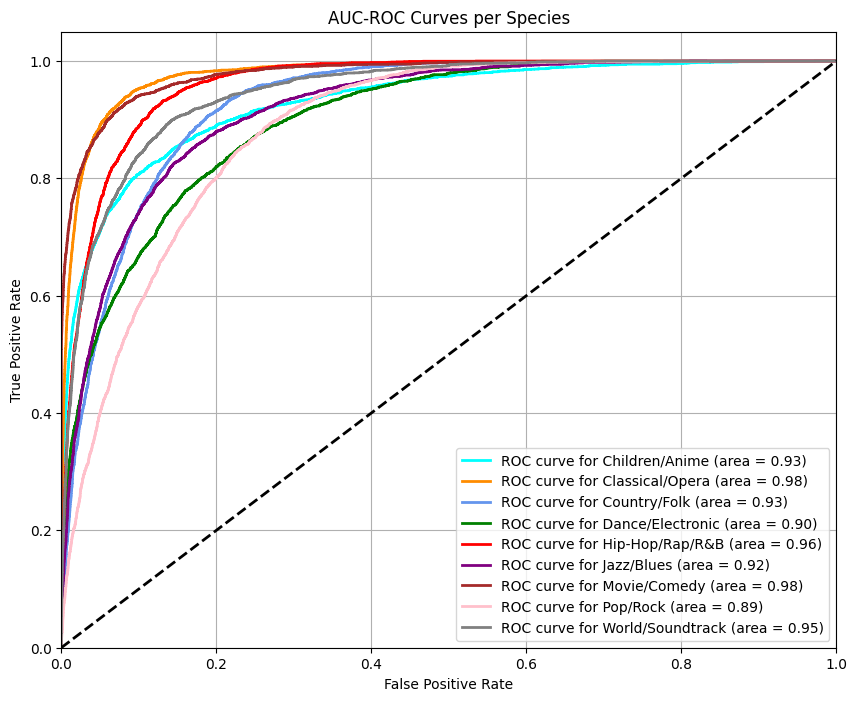

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
y_true = y_test
n_classes = y_true.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_probs4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red',
          'purple', 'brown', 'pink', 'grey', 'olive', 'gold', 'black']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for {label_encoder.classes_[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves per Species')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


From the above plot, the AUC (Area Under Curve) values range from 0.89 to 0.98, which indicates that the model performs very well across all genre classes.

Classical/Opera and Movie/Comedy achieved the highest AUC values of 0.98, suggesting that the model is highly effective in distinguishing these genres from the others. The lowest AUC was for Pop/Rock (0.89), indicating that this genre is the most challenging to classify.

## Conventional Methods

In [135]:
df_multi = X.copy()
y_multi = spotify_df['genre_grouped']
X_train, X_test, y_train, y_test = train_test_split(
    df_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

## Decision Trees

In [138]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 5322)
param_grid = {
    'max_depth': [3, 5, 6, X_train.shape[1]],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

multi_dt = DecisionTreeClassifier(random_state = 5322)
grid_search = GridSearchCV(
    estimator = multi_dt,
    param_grid = param_grid,
    cv = cv,
    scoring = 'f1_weighted',
    n_jobs = -1,
    verbose = 1
)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
training_duration = end_time - start_time
print(f"Training time (Decision Tree with GridSearchCV): {training_duration:.2f} seconds")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Training time (Decision Tree with GridSearchCV): 56.89 seconds


In [140]:
grid_search.best_params_

{'class_weight': None,
 'max_depth': 11,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [142]:
best_multi_dt = grid_search.best_estimator_

binary_multi_pred = best_multi_dt.predict(X_test)
print(classification_report(y_test, binary_multi_pred))

                  precision    recall  f1-score   support

  Children/Anime       0.64      0.49      0.56      3135
 Classical/Opera       0.74      0.78      0.76      3398
    Country/Folk       0.43      0.52      0.47      3086
Dance/Electronic       0.60      0.65      0.62      8477
 Hip-Hop/Rap/R&B       0.58      0.55      0.56      2845
      Jazz/Blues       0.45      0.38      0.41      3307
    Movie/Comedy       0.81      0.72      0.76      3495
        Pop/Rock       0.42      0.45      0.44      4321
World/Soundtrack       0.62      0.58      0.60      3291

        accuracy                           0.58     35355
       macro avg       0.59      0.57      0.58     35355
    weighted avg       0.59      0.58      0.58     35355



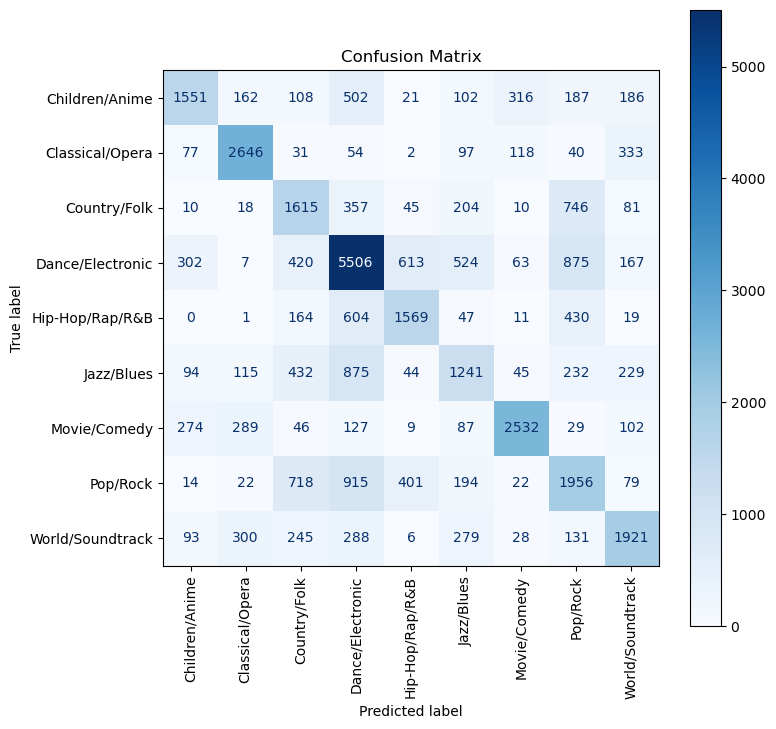

In [144]:
class_names = [
    "Children/Anime",
    "Classical/Opera",
    "Country/Folk",
    "Dance/Electronic",
    "Hip-Hop/Rap/R&B",
    "Jazz/Blues",
    "Movie/Comedy",
    "Pop/Rock",
    "World/Soundtrack"
]
cm_dt = confusion_matrix(y_test, binary_multi_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Variable importance for Decision Tree model')

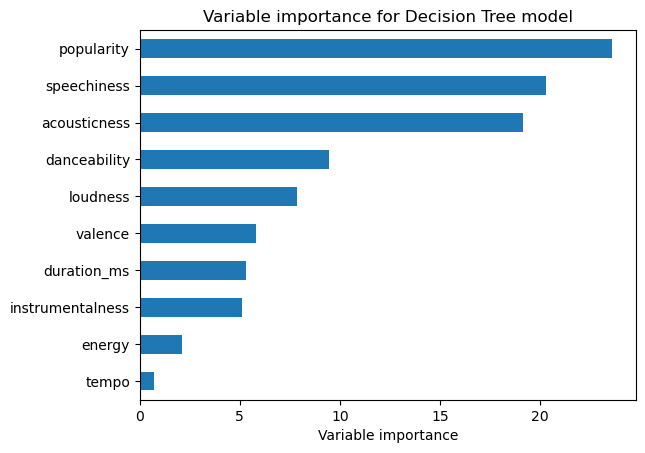

In [146]:
# Plotting the variable importance for boosting model
feature_importance = best_multi_dt.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=numeric_features).sort_values(ascending = True,inplace=False)
rel_imp.tail(10).T.plot(kind='barh')
plt.xlabel('Variable importance')
plt.title('Variable importance for Decision Tree model')

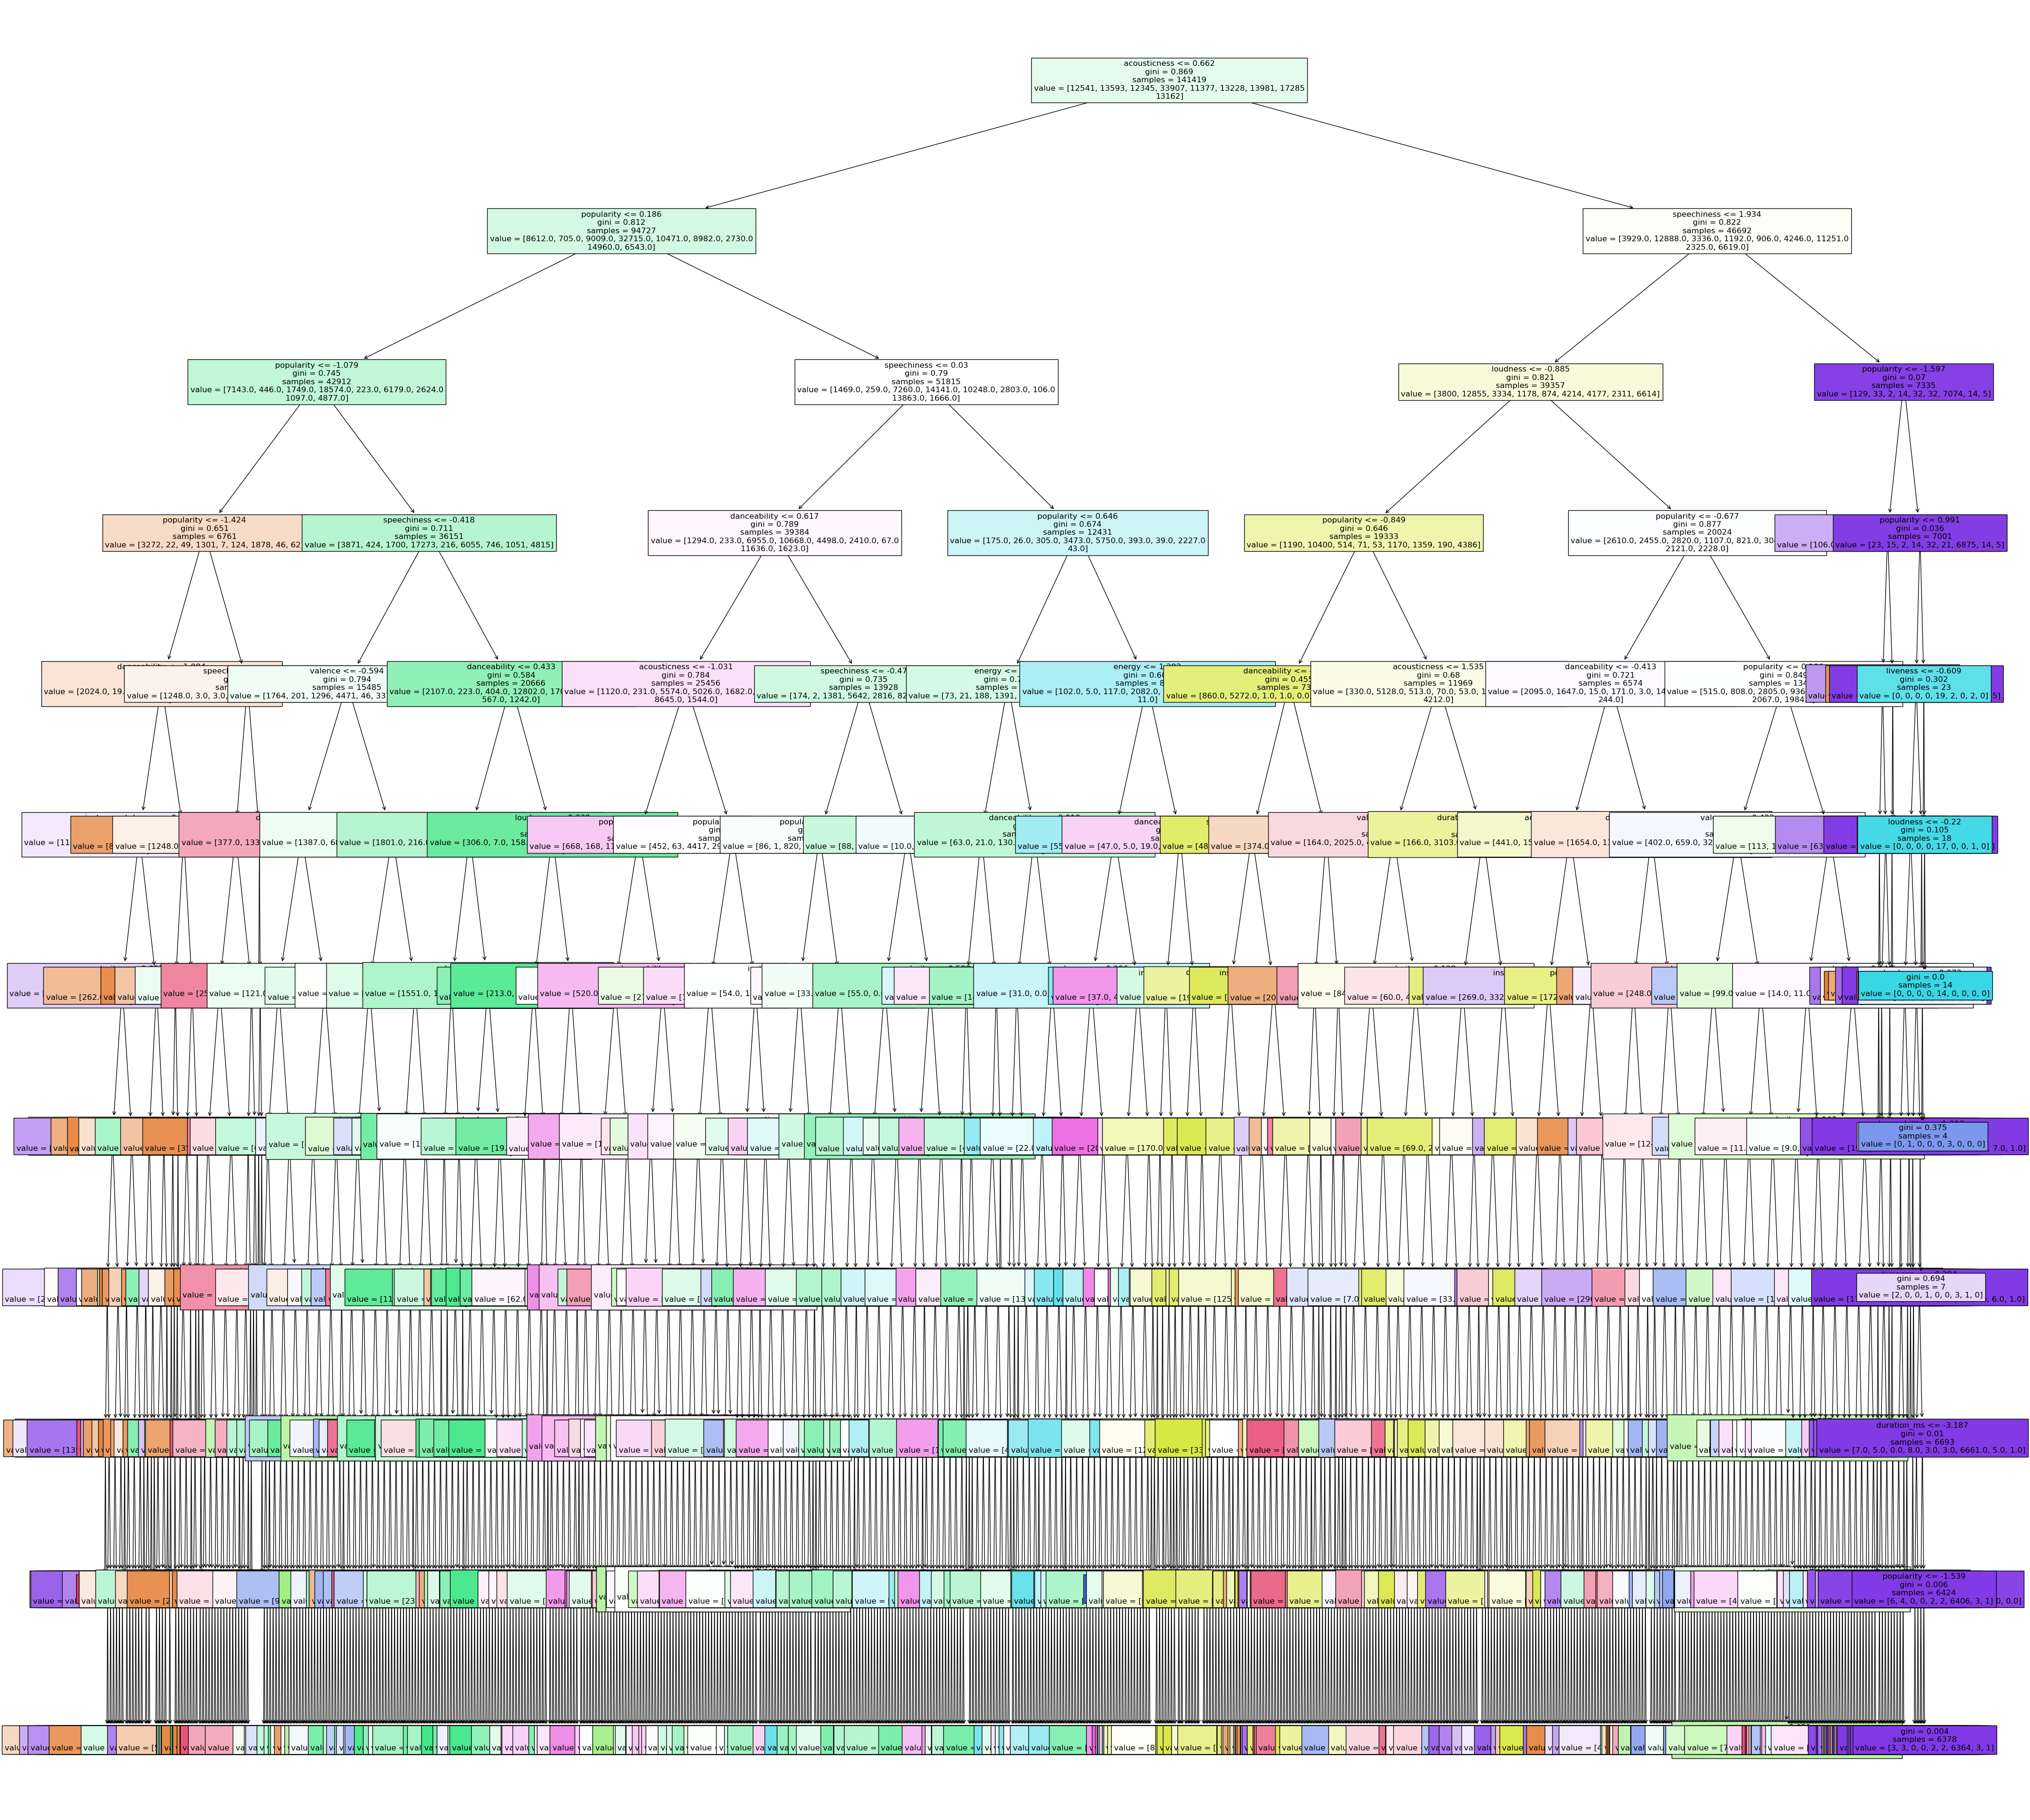

In [148]:
plt.figure(figsize=(50,50))
plot_tree(best_multi_dt
          , filled=True
          , feature_names=numeric_features
          , label='all'
          , fontsize=12)
plt.show()

The Decision Tree model was trained to classify tracks into one of nine grouped genres using musical features such as tempo, loudness, acousticness, and danceability. Hyperparameters 'max_depth', 'min_samples_split', 'min_samples_leaf' were optimized using a grid search with 5-fold cross-validation. 

Best Model Parameters:
max_depth: 11
min_samples_split: 2
min_samples_leaf: 4
class_weight: None

Overall Performance:
Accuracy: 58%

Children/Anime	- Of all the tracks the model labeled as Children/Anime, 64% were actually from this genre. However, it only managed to correctly identify 49% of all actual Children/Anime tracks. So it's fairly precise but misses many true ones.

Classical/Opera	- Of all the tracks labeled Classical/Opera, 74% were correct. And it captured 78% of all true Classical/Opera tracks. This is one of the most reliable genres in terms of prediction.

Country/Folk - Only 43% of tracks predicted as Country/Folk were correct meaning it's often confused with other genres. It found 52% of actual Country/Folk tracks. Both precision and recall are low, indicating confusion with similar genres.

Dance/Electronic - When predicting Dance/Electronic, 60% of those predictions were correct, and it captured 65% of true instances. This is decent, showing good model understanding for this genre.

Hip-Hop/Rap/R&B	- Of all the tracks predicted as Hip-Hop/Rap/R&B, 58% were correct, and it found 55% of the actual ones. Performance here is average, with moderate false positives and false negatives.

Jazz/Blues - Only 45% of the predicted Jazz/Blues tracks were truly from this genre, and just 38% of actual Jazz/Blues tracks were identified. This is one of the weakest genres, indicating heavy misclassification.

Movie/Comedy - 	81% of the tracks labeled as Movie/Comedy were correct showing the model is very confident when it predicts this genre. It also identified 72% of all actual Movie/Comedy tracks. This is a very strong performing class.

Pop/Rock - Only 42% of the tracks predicted as Pop/Rock were correct, and the model found 45% of the true Pop/Rock tracks. Performance is weak, possibly due to similarity with Country or Dance genres.

World/Soundtrack - Of all tracks labeled World/Soundtrack, 62% were correct, and it captured 58% of actual ones. This is a moderately well-performing class, with some confusion likely with Classical or Movie genres.

## Random Forest

In [154]:
# Random Forest

# Parameter grid for tuning
#param_grid = {
    #'n_estimators': [150, 200, 250],
    #'max_depth': [4,5,6],
    #'min_samples_split': [2, 5],
    #'min_samples_leaf': [1, 2],
    #'max_features': [0.5]
#}

#grid_search = GridSearchCV(
    #estimator=rf,
    #param_grid=param_grid,
    #cv=5,
    #scoring='f1_weighted',
    #n_jobs=-1,
   #verbose=1
#)
rf = RandomForestClassifier(n_estimators = 200, max_depth = 6, max_features=6, random_state=42)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
training_duration = end_time - start_time
print(f"Training time (RandomForest): {training_duration:.2f} seconds")

Training time (RandomForest): 38.42 seconds


In [170]:
y_pred_best = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Classification Report:
                  precision    recall  f1-score   support

  Children/Anime       0.58      0.39      0.47      3135
 Classical/Opera       0.67      0.82      0.74      3398
    Country/Folk       0.42      0.38      0.40      3086
Dance/Electronic       0.50      0.74      0.60      8477
 Hip-Hop/Rap/R&B       0.58      0.48      0.52      2845
      Jazz/Blues       0.45      0.17      0.25      3307
    Movie/Comedy       0.90      0.62      0.73      3495
        Pop/Rock       0.40      0.47      0.43      4321
World/Soundtrack       0.62      0.50      0.55      3291

        accuracy                           0.54     35355
       macro avg       0.57      0.51      0.52     35355
    weighted avg       0.56      0.54      0.53     35355



Text(0.5, 1.0, 'Variable importance for Decision Tree model')

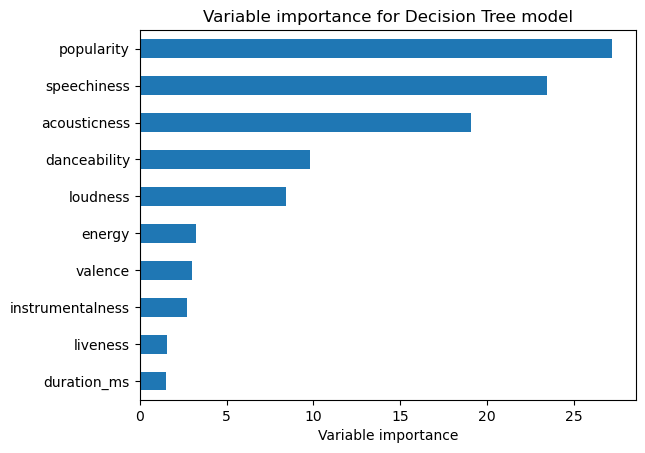

In [172]:
feature_importance = rf.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=numeric_features).sort_values(ascending = True,inplace=False)
rel_imp.tail(10).T.plot(kind='barh')
plt.xlabel('Variable importance')
plt.title('Variable importance for Decision Tree model')

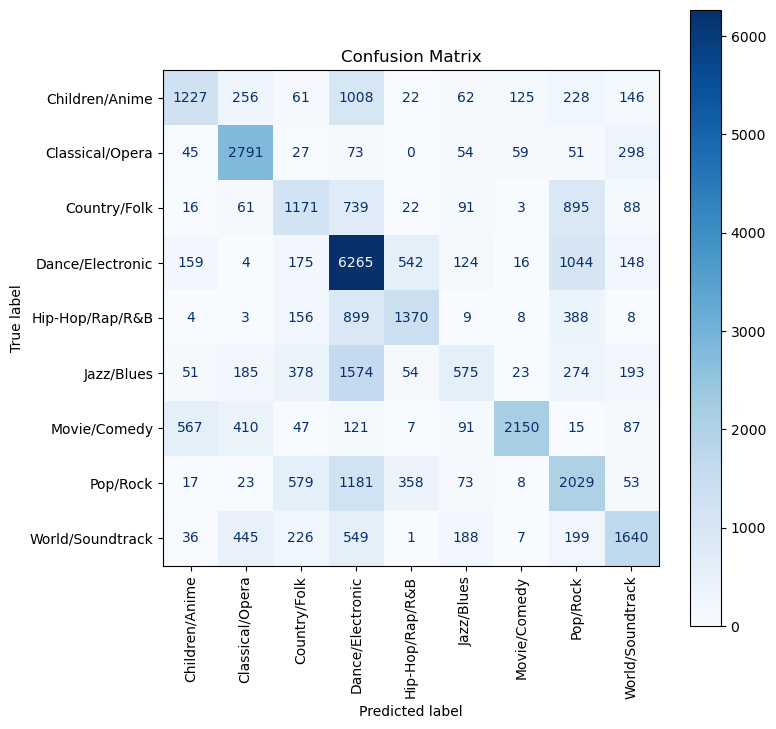

In [174]:
cm_rf = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()

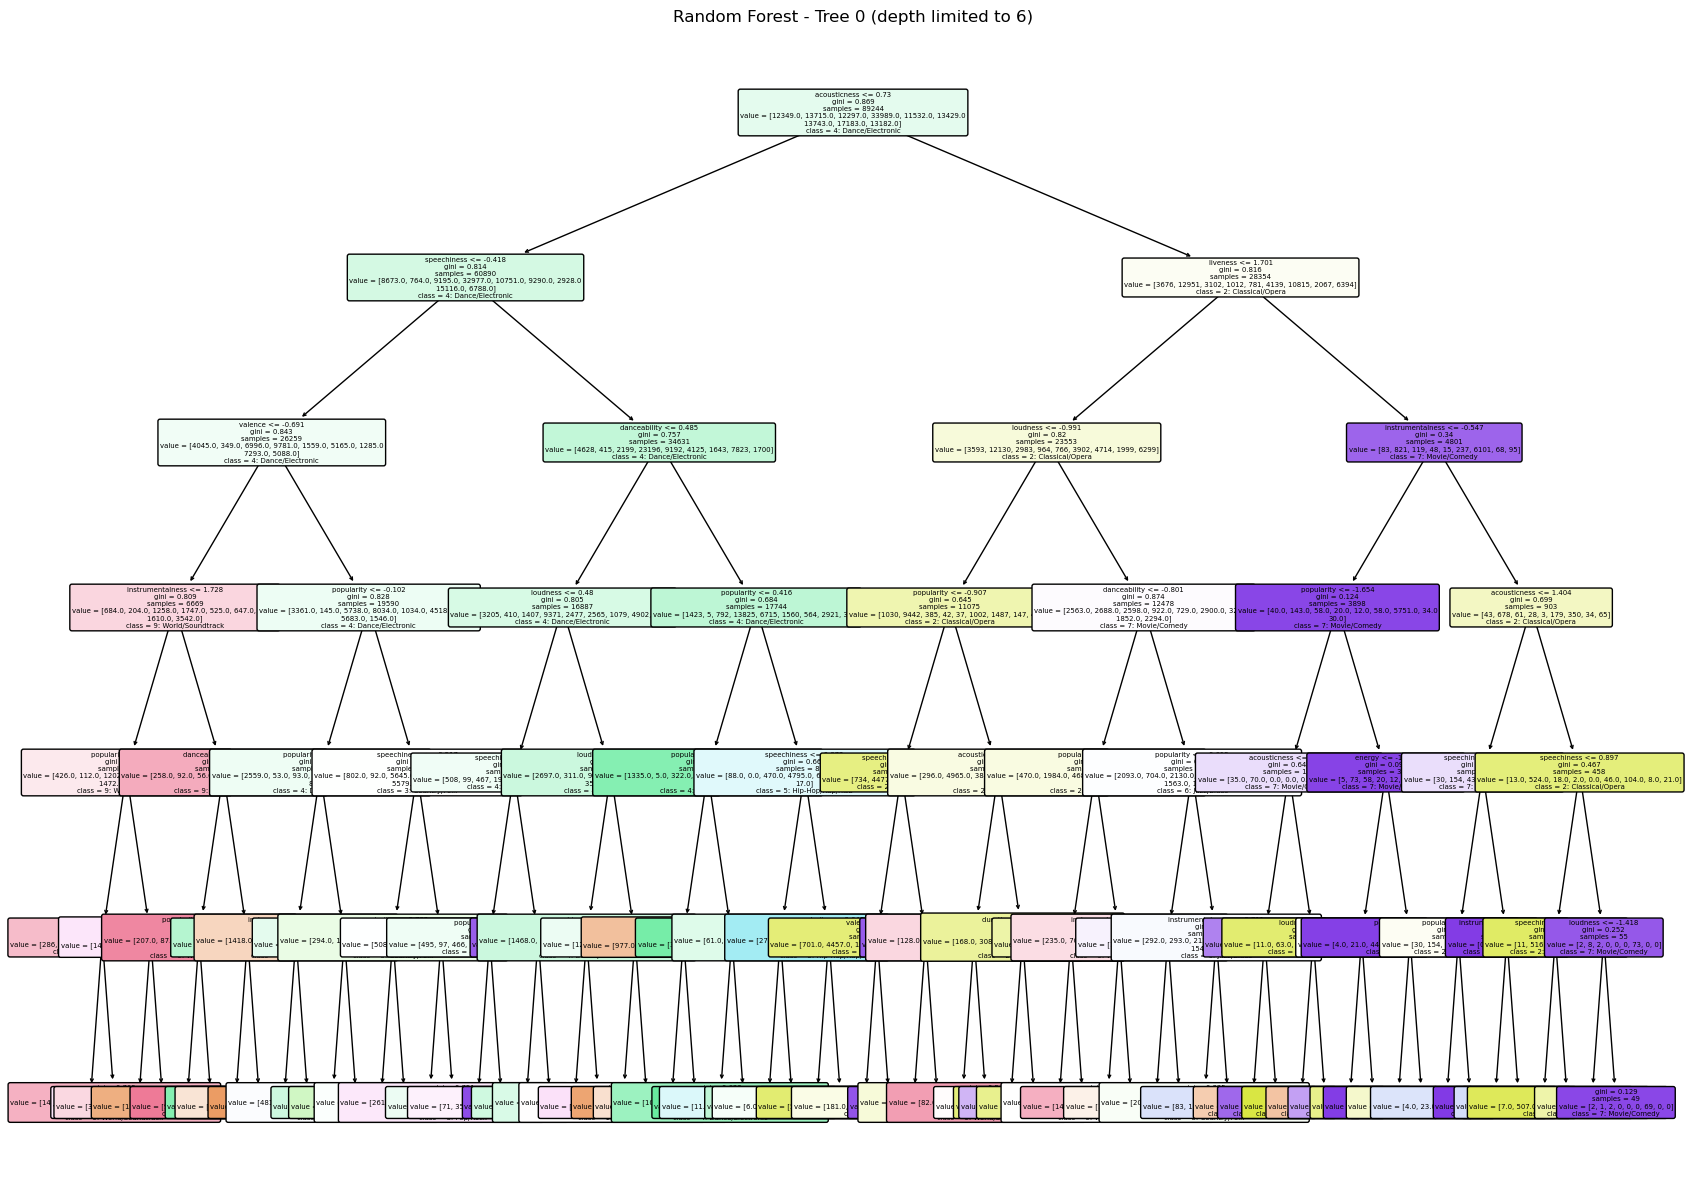

In [176]:
class_names1 = [
    "1: Children/Anime",
    "2: Classical/Opera",
    "3: Country/Folk",
    "4: Dance/Electronic",
    "5: Hip-Hop/Rap/R&B",
    "6: Jazz/Blues",
    "7: Movie/Comedy",
    "8: Pop/Rock",
    "9: World/Soundtrack"
]
fig = plt.figure(figsize=(20, 15))
plot_tree(rf.estimators_[0], feature_names=numeric_features, class_names=class_names1, filled=True, rounded=True, fontsize = 5)
plt.title("Random Forest - Tree 0 (depth limited to 6)")
plt.show()
fig.savefig("rf_tree_depth4.pdf", bbox_inches='tight')
plt.close(fig)

Best Model Parameters:
n_estimators = 200,
max_depth = 6, 
max_features=6

Model Performance:
Accuracy - 54%

Higher precision in Movie/Comedy (90%) and recall in Dance/Electronic (74%) and Classical/Opera (82%). This implies that when the model predicts a track as Movie/Comedy 9 out 10 times eventhough the dataset contains Dance/Electronic as the majority class. Similarly the model successfully retriueves most of the actual tracks belonging to the genre Dance/Electronic and Classical/Opera.

But overall, recall drops sharply in many genres especially Jazz/Blues.


## Gradient Boosting

In [180]:
# Parameter grid for tuning
#param_grid = {
    #'n_estimators': [150, 200, 250],
    #'max_depth': [4,5,6],
    #'min_samples_split': [2, 5],
    #'min_samples_leaf': [1, 2],
    #'learning_rate': [0.01, 0.05, 0.1]
#}

#grid_search = GridSearchCV(
    #estimator=Tree_Bst_reg,
    #param_grid=param_grid,
    #cv=5,
    #scoring='f1_weighted',
    #n_jobs=-1,
   #verbose=1
#)

In [182]:
Tree_Bst_reg = GradientBoostingClassifier(n_estimators=250, learning_rate=0.1, max_depth=4, random_state=1)
start_time = time.time()
Tree_Bst_reg.fit(X_train,y_train)
end_time = time.time()
training_duration = end_time - start_time
print(f"Training time (GradientBoosting ): {training_duration:.2f} seconds")

Training time (GradientBoosting ): 881.50 seconds


In [186]:
y_pred_bag_reg = Tree_Bst_reg.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_bag_reg))

Classification Report:
                  precision    recall  f1-score   support

  Children/Anime       0.71      0.55      0.62      3135
 Classical/Opera       0.78      0.82      0.80      3398
    Country/Folk       0.49      0.56      0.52      3086
Dance/Electronic       0.65      0.72      0.68      8477
 Hip-Hop/Rap/R&B       0.59      0.60      0.60      2845
      Jazz/Blues       0.54      0.46      0.50      3307
    Movie/Comedy       0.83      0.76      0.80      3495
        Pop/Rock       0.47      0.47      0.47      4321
World/Soundtrack       0.67      0.65      0.66      3291

        accuracy                           0.63     35355
       macro avg       0.64      0.62      0.63     35355
    weighted avg       0.64      0.63      0.63     35355



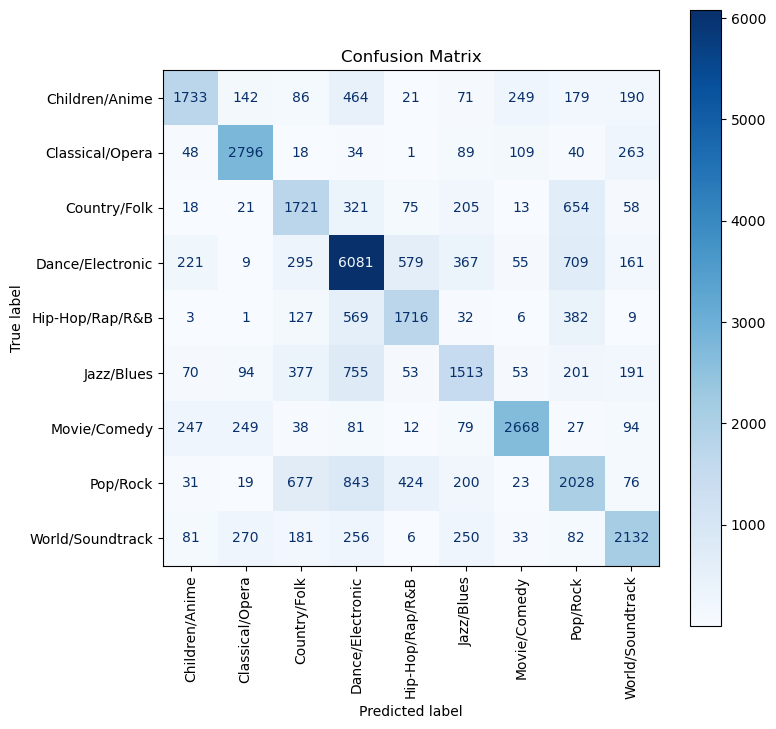

In [188]:
cm_gb = confusion_matrix(y_test, y_pred_bag_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Variable importance for Decision Tree model')

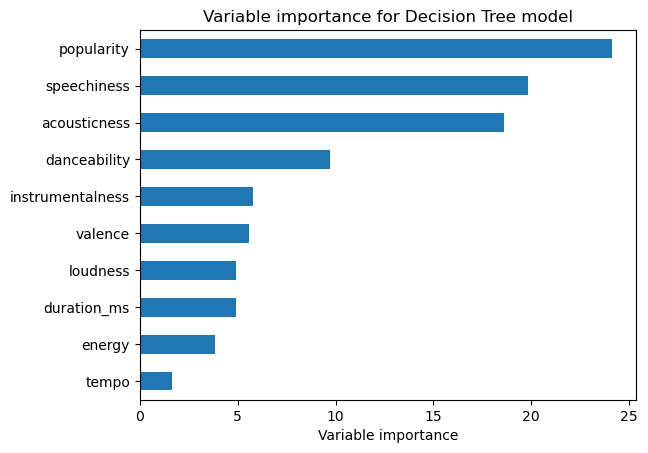

In [190]:
feature_importance = Tree_Bst_reg.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=numeric_features).sort_values(ascending = True,inplace=False)
rel_imp.tail(10).T.plot(kind='barh')
plt.xlabel('Variable importance')
plt.title('Variable importance for Decision Tree model')

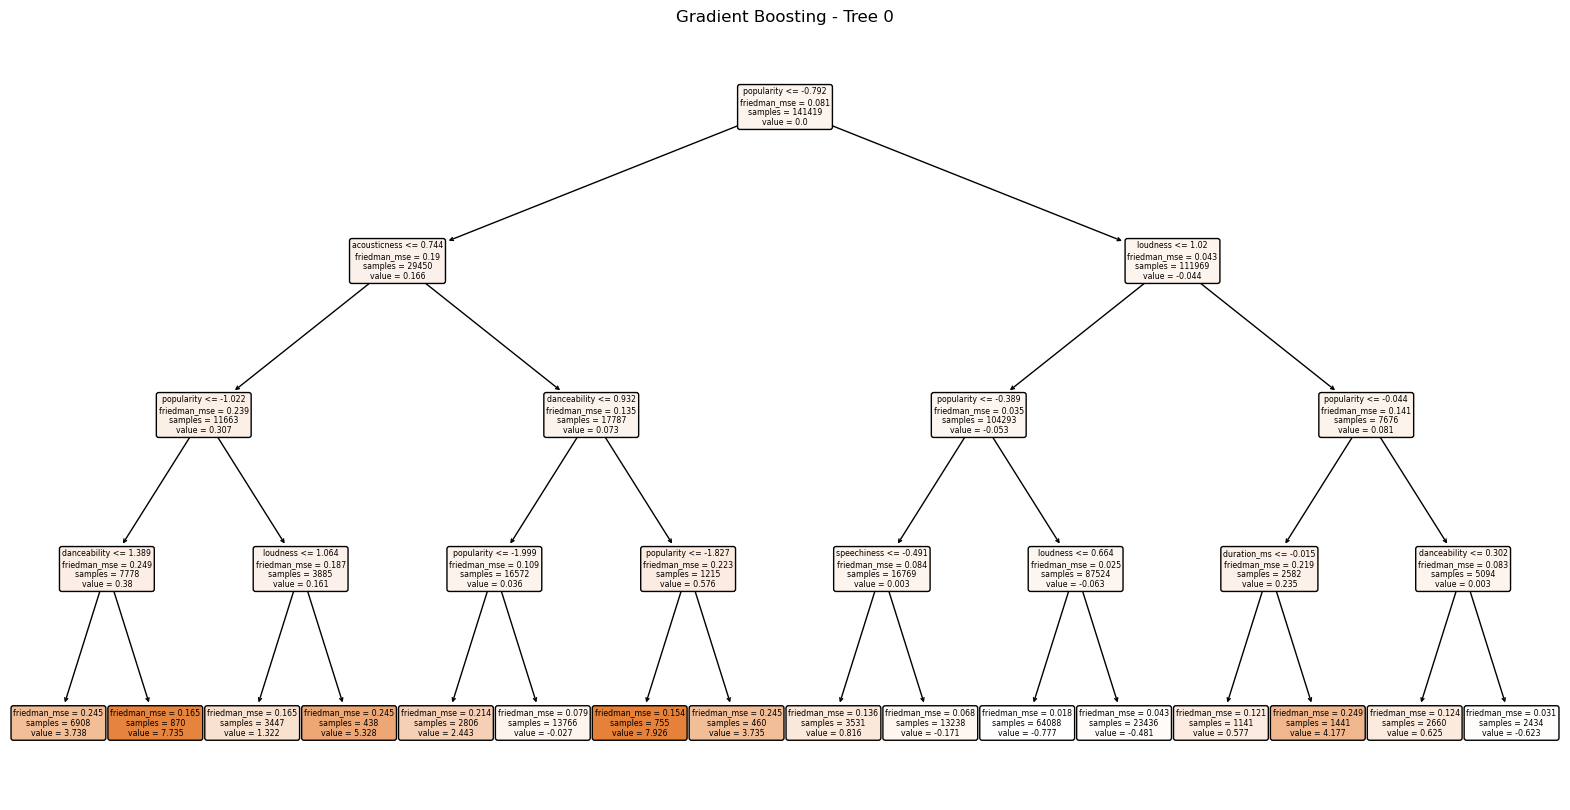

In [192]:
class_names = [
    "1: Children/Anime",
    "2: Classical/Opera",
    "3: Country/Folk",
    "4: Dance/Electronic",
    "5: Hip-Hop/Rap/R&B",
    "6: Jazz/Blues",
    "7: Movie/Comedy",
    "8: Pop/Rock",
    "9: World/Soundtrack"
]

plt.figure(figsize=(20, 10))
plot_tree(Tree_Bst_reg.estimators_[0,0], feature_names=numeric_features, class_names=class_names, filled=True, rounded=True, max_depth=4)
plt.title("Gradient Boosting - Tree 0")
plt.show()

Model Parameters:
n_estimators=200
learning_rate=0.1
max_depth=4

Model Performance:
Accuracy = 63%

Classical/Opera and Movie/Comedy which has a perfect balance between precision and recall,  model is both accurate and consistent in identifying this genre.

Dance/Electronic:
The interesting thing here is even though the model is exposed to a significantly higher number of Dance/Electronic tracks during training, it does not overfit by assigning this label to ambiguous tracks. Instead, it tries to balance class prediction, maintaining reasonable precision

This indicates the model is not biased towards the majority class.

Pop/Rock has both low precision (47%) and recall (47%) indicating this genre remains hard for the model to classify.

Jazz/Blues has one of the lowest recall scores (46%) many actual Jazz/Blues tracks are being misclassified.

Indicates this genre is still not well captured by the model.

Gradient Boosting achieves the best balance between precision and recall across all most all genres when compared to decision tree and random forest.


In [195]:
y_multibst = spotify_df['genre_grouped']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_multibst)
y_train_ds1 = label_encoder.fit_transform(y_train)
y_test_ds1 = label_encoder.fit_transform(y_test)
X_train, X_test, y_train, y_test = train_test_split(
    df_multi, y_encoded, test_size=0.2, random_state=42, stratify=y_multi
)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:28:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training time (XGBoost): 3.95 seconds


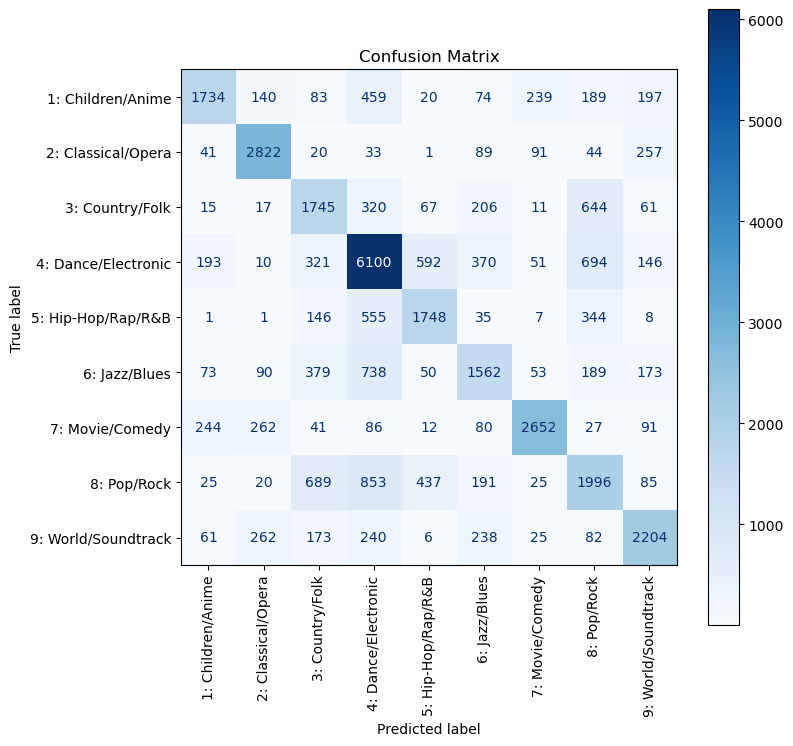


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.55      0.63      3135
           1       0.78      0.83      0.80      3398
           2       0.49      0.57      0.52      3086
           3       0.65      0.72      0.68      8477
           4       0.60      0.61      0.61      2845
           5       0.55      0.47      0.51      3307
           6       0.84      0.76      0.80      3495
           7       0.47      0.46      0.47      4321
           8       0.68      0.67      0.68      3291

    accuracy                           0.64     35355
   macro avg       0.64      0.63      0.63     35355
weighted avg       0.64      0.64      0.64     35355



In [207]:
import xgboost as xgb

# Create the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=9,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=250,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Train the model
start_time = time.time()
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
end_time = time.time()
training_duration = end_time - start_time
print(f"Training time (XGBoost): {training_duration:.2f} seconds")

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Text(0.5, 1.0, 'Variable importance for Decision Tree model')

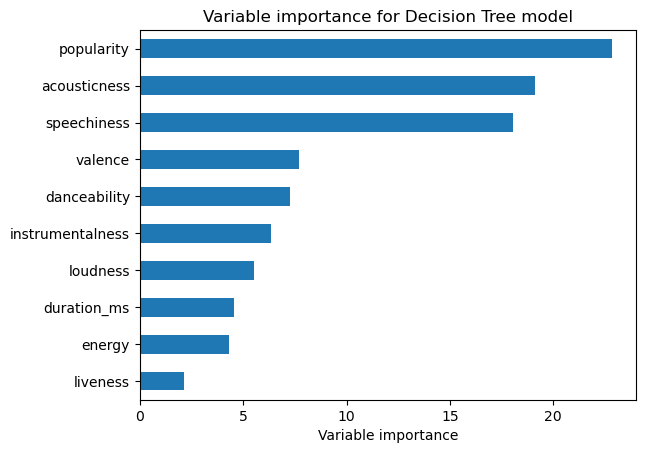

In [209]:
feature_importance = xgb_clf.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=numeric_features).sort_values(ascending = True,inplace=False)
rel_imp.tail(10).T.plot(kind='barh')
plt.xlabel('Variable importance')
plt.title('Variable importance for Decision Tree model')

## KNN

In [85]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    df_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights= "uniform", p=2)  # Euclidean distance
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56      3135
           1       0.69      0.79      0.74      3398
           2       0.37      0.51      0.43      3086
           3       0.60      0.69      0.64      8477
           4       0.55      0.49      0.52      2845
           5       0.48      0.38      0.43      3307
           6       0.83      0.71      0.76      3495
           7       0.41      0.31      0.36      4321
           8       0.61      0.56      0.58      3291

    accuracy                           0.57     35355
   macro avg       0.57      0.56      0.56     35355
weighted avg       0.57      0.57      0.57     35355



In [89]:
from sklearn.decomposition import PCA, TruncatedSVD

svd = TruncatedSVD(n_components=df_multi.shape[1] - 1, random_state=42)
svd.fit(df_multi)

TruncatedSVD(n_components=10, random_state=42)

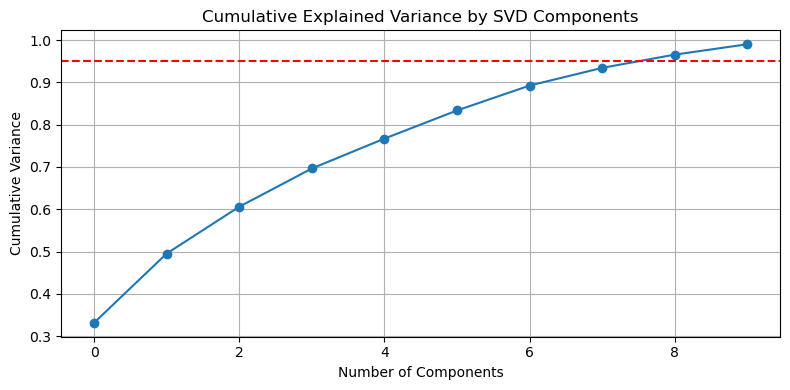

In [91]:
explained_var = np.cumsum(svd.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(explained_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title("Cumulative Explained Variance by SVD Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
pca = PCA(n_components=7, random_state=42)
X_train_pca = pca.fit_transform(df_multi)

In [95]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_train_pca, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights= "uniform", p=2)  # Euclidean distance
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56      3135
           1       0.69      0.79      0.74      3398
           2       0.37      0.51      0.43      3086
           3       0.60      0.69      0.64      8477
           4       0.55      0.49      0.52      2845
           5       0.48      0.38      0.43      3307
           6       0.83      0.71      0.76      3495
           7       0.41      0.31      0.36      4321
           8       0.61      0.56      0.58      3291

    accuracy                           0.57     35355
   macro avg       0.57      0.56      0.56     35355
weighted avg       0.57      0.57      0.57     35355



After applying PCA with 7 components training is done using KNN classifier. The accuracy dropped from 57% to 53% compared to the original KNN model (without PCA). This indicates the reduced feature space didn't preserve enough information for genre classification.